In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, RANSACRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold, ShuffleSplit, GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import xgboost as xgb
from PIL import Image, ImageOps
from PIL import ImageOps
from sklearn.metrics import ndcg_score
import shap
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("president_raw_data.csv", encoding='utf-8')
df_2 = pd.read_csv("electoral_votes_per_state_2020.csv", encoding='utf-8')
df.fillna(0, inplace=True)

### Analyze President State Data | What are battleground states, most influential states, what are the Blue and Red Locks?

In [3]:
print(list(df))

['Year', 'candidate', 'number_of_children', 'party', 'age', 'years_in_politics', 'estimated_speeches_campaign', 'bgs_est_speeches_campaign', 'won_en_Nevada', 'won_en_Alabama', 'won_en_Alaska', 'won_en_Arizona', 'won_en_Arkansas', 'won_en_Florida', 'won_en_Georgia', 'won_en_Idaho', 'won_en_Indiana', 'won_en_Iowa', 'won_en_Kansas', 'won_en_Kentucky', 'won_en_Louisiana', 'won_en_Maine', 'won_en_Michigan', 'won_en_Mississippi', 'won_en_Missouri', 'won_en_Montana', 'won_en_Nebraska', 'won_en_North Carolina', 'won_en_North Dakota', 'won_en_Ohio', 'won_en_Oklahoma', 'won_en_Pennsylvania', 'won_en_South Carolina', 'won_en_South Dakota', 'won_en_Tennessee', 'won_en_Texas', 'won_en_Utah', 'won_en_West Virginia', 'won_en_Wisconsin', 'won_en_Wyoming', 'won_en_California', 'won_en_Colorado', 'won_en_Connecticut', 'won_en_Delaware', 'won_en_Hawaii', 'won_en_Illinois', 'won_en_Maryland', 'won_en_Massachusetts', 'won_en_Minnesota', 'won_en_New Hampshire', 'won_en_New Jersey', 'won_en_New Mexico', 'won

In [4]:
df = df[df['Year'] != 2024]

In [5]:

columns = ['won_en_Nevada','won_en_Alabama', 'won_en_Alaska', 'won_en_Arizona', 'won_en_Arkansas', 
           'won_en_Florida', 'won_en_Georgia', 'won_en_Idaho', 'won_en_Indiana', 
           'won_en_Iowa', 'won_en_Kansas', 'won_en_Kentucky', 'won_en_Louisiana', 
           'won_en_Maine', 'won_en_Michigan', 'won_en_Mississippi', 'won_en_Missouri', 
           'won_en_Montana', 'won_en_Nebraska', 'won_en_North Carolina', 
           'won_en_North Dakota', 'won_en_Ohio', 'won_en_Oklahoma', 'won_en_Pennsylvania', 
           'won_en_South Carolina', 'won_en_South Dakota', 'won_en_Tennessee', 
           'won_en_Texas', 'won_en_Utah', 'won_en_West Virginia', 'won_en_Wisconsin', 
           'won_en_Wyoming', 'won_en_California', 'won_en_Colorado', 'won_en_Connecticut', 
           'won_en_Delaware', 'won_en_Hawaii', 'won_en_Illinois', 'won_en_Maryland', 
           'won_en_Massachusetts', 'won_en_Minnesota', 'won_en_New Hampshire', 
           'won_en_New Jersey', 'won_en_New Mexico', 'won_en_New York', 'won_en_Oregon', 
           'won_en_Rhode Island', 'won_en_Vermont', 'won_en_Virginia', 
           'won_en_Washington', 'won_en_Washington, D.C.']

df.columns = df.columns.str.replace('won_en_', '')

new_columns = [col.replace('won_en_', '') for col in columns]
new_columns.append('president')  # Assuming you want to include 'president' column as well

correlation_matrix = df[new_columns].corr()

president_correlation = correlation_matrix['president'].drop('president')

sorted_correlation = president_correlation.sort_values(ascending=False).reset_index()
sorted_correlation.columns = ['State', 'Correlation_with_President']

merged_df = pd.merge(sorted_correlation, df_2, on='State', how='left')

merged_df

,State,Correlation_with_President,Electoral Votes
0,Nevada,7.857143e-01,6.0
1,New Mexico,7.142857e-01,5.0
2,Colorado,6.428571e-01,10.0
3,Kentucky,5.714286e-01,8.0
4,Delaware,5.714286e-01,3.0
5,Missouri,5.714286e-01,10.0
6,California,5.000000e-01,54.0
7,Montana,5.000000e-01,4.0
8,Wisconsin,4.285714e-01,10.0
9,Nebraska,4.285714e-01,5.0


In [6]:

df.columns = df.columns.str.replace('won_en_', '')

columns_to_calculate = ['Year', 'candidate', 'president', 'Nevada',
                        'Alabama', 'Alaska', 'Arizona', 'Arkansas', 
                        'Florida', 'Georgia', 'Idaho', 'Indiana', 'Iowa', 
                        'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 
                        'Mississippi', 'Missouri', 'Montana', 'Nebraska', 
                        'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 
                        'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee', 
                        'Texas', 'Utah', 'West Virginia', 'Wisconsin', 'Wyoming', 
                        'California', 'Colorado', 'Connecticut', 'Delaware', 
                        'Hawaii', 'Illinois', 'Maryland', 'Massachusetts', 'Minnesota', 
                        'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
                        'Oregon', 'Rhode Island', 'Vermont', 'Virginia', 
                        'Washington', 'Washington, D.C.']

df_sorted = df[df['president'] == 1][columns_to_calculate]

win_perc = df_sorted.iloc[:, 3:].sum() / len(df_sorted) * 100
win_perc = win_perc.round(1).sort_values(ascending=False)

win_perc_df = pd.DataFrame(win_perc).reset_index()
win_perc_df.columns = ['State', 'Win_Percentage']

merged_win_perc_df = pd.merge(win_perc_df, df_2, on='State', how='left')

merged_win_perc_df

,State,Win_Percentage,Electoral Votes
0,Nevada,89.3,6.0
1,New Mexico,85.7,5.0
2,Colorado,82.1,10.0
3,Kentucky,78.6,8.0
4,Delaware,78.6,3.0
5,Missouri,78.6,10.0
6,California,75.0,54.0
7,Montana,75.0,4.0
8,Oklahoma,71.4,7.0
9,Arizona,71.4,11.0


In [7]:

state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'Washington, D.C.': 'DC'  
}

merged_win_perc_df['State_Abbrev'] = merged_win_perc_df['State'].map(state_abbrev)

merged_win_perc_df['Win_Percentage_Label'] = merged_win_perc_df['Win_Percentage'].round(0).astype(int).astype(str)

fig = px.choropleth(merged_win_perc_df, 
                    locations='State_Abbrev', 
                    locationmode="USA-states",  
                    color='Win_Percentage', 
                    color_continuous_scale="Greens", 
                    scope="usa",  
                    labels={'Win_Percentage':'Win %'}, 
                   )

fig.update_layout(title_text='Presidential Win Percentage by State', 
                  geo=dict(scope='usa'),
                  width=1200,  
                  height=800  
                 )

fig.add_trace(go.Scattergeo(
    locations=merged_win_perc_df['State_Abbrev'], 
    locationmode='USA-states',  
    text=merged_win_perc_df['Win_Percentage_Label'], 
    mode='text', 
    textfont=dict(size=12, color='black'),  
))

fig.show()


In [8]:



columns = ['Nevada','Alabama', 'Alaska', 'Arizona', 'Arkansas', 
           'Florida', 'Georgia', 'Idaho', 'Indiana', 'Iowa', 
           'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 
           'Mississippi', 'Missouri', 'Montana', 'Nebraska', 
           'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 
           'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee', 
           'Texas', 'Utah', 'West Virginia', 'Wisconsin', 'Wyoming', 
           'California', 'Colorado', 'Connecticut', 'Delaware', 
           'Hawaii', 'Illinois', 'Maryland', 'Massachusetts', 'Minnesota', 
           'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
           'Oregon', 'Rhode Island', 'Vermont', 'Virginia', 
           'Washington', 'Washington, D.C.', 'party']

existing_columns = [col for col in columns if col in df.columns]

if existing_columns:
    sorted_correlation_df = df[existing_columns].corr()['party'].drop('party').sort_values(ascending=False).reset_index()
    sorted_correlation_df.columns = ['State', 'Correlation_with_Party']

    sorted_correlation_df = pd.merge(sorted_correlation_df, df_2, on='State', how='left')

    middle_index_start = (len(sorted_correlation_df) - 2) // 2
    middle_index_end = middle_index_start + 2
    smallest_indices = sorted_correlation_df.nsmallest(20, 'Correlation_with_Party').index
    largest_indices = sorted_correlation_df.nlargest(20, 'Correlation_with_Party').index

    def highlight_rows(row):
        if middle_index_start <= row.name < middle_index_end:
            return ['background-color: yellow'] * len(row)
        elif row.name in smallest_indices:
            return ['background-color: lightblue'] * len(row)
        elif row.name in largest_indices:
            return ['background-color: lightcoral'] * len(row)
        return [''] * len(row)

    styled_df = sorted_correlation_df.style.apply(highlight_rows, axis=1)
    styled_df
else:
    print("No columns to proceed with.")

styled_df

,State,Correlation_with_Party,Electoral Votes
0,Alaska,0.857143,3.000000
1,Kansas,0.785714,6.000000
2,North Dakota,0.714286,3.000000
3,Wyoming,0.642857,3.000000
4,South Dakota,0.642857,3.000000
5,Indiana,0.571429,11.000000
6,Idaho,0.500000,4.000000
7,Utah,0.500000,6.000000
8,Ohio,0.500000,17.000000
9,Nebraska,0.428571,5.000000


In [9]:

df.columns = df.columns.str.replace('won_en_', '')

columns_to_calculate = ['Year', 'candidate', 'president', 'Nevada',
                        'Alabama', 'Alaska', 'Arizona', 'Arkansas', 
                        'Florida', 'Georgia', 'Idaho', 'Indiana', 'Iowa', 
                        'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 
                        'Mississippi', 'Missouri', 'Montana', 'Nebraska', 
                        'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 
                        'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee', 
                        'Texas', 'Utah', 'West Virginia', 'Wisconsin', 'Wyoming', 
                        'California', 'Colorado', 'Connecticut', 'Delaware', 
                        'Hawaii', 'Illinois', 'Maryland', 'Massachusetts', 'Minnesota', 
                        'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
                        'Oregon', 'Rhode Island', 'Vermont', 'Virginia', 
                        'Washington', 'Washington, D.C.']

df_sorted = df[df['party'] == 1][columns_to_calculate]

win_perc = df_sorted.iloc[:, 3:].sum() / len(df_sorted) * 100
win_perc = win_perc.round(1).sort_values(ascending=False)

win_perc_df = pd.DataFrame(win_perc).reset_index()
win_perc_df.columns = ['State', 'Win_Percentage']

merged_win_perc_df = pd.merge(win_perc_df, df_2, on='State', how='left')

merged_win_perc_df

,State,Win_Percentage,Electoral Votes
0,Alaska,92.9,3.0
1,Kansas,89.3,6.0
2,North Dakota,85.7,3.0
3,South Dakota,82.1,3.0
4,Wyoming,82.1,3.0
5,Indiana,78.6,11.0
6,Ohio,75.0,17.0
7,Utah,75.0,6.0
8,Idaho,75.0,4.0
9,Oklahoma,71.4,7.0


In [11]:

state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'Washington, D.C.': 'DC'  
}

merged_win_perc_df['State_Abbrev'] = merged_win_perc_df['State'].map(state_abbrev)

merged_win_perc_df['Win_Percentage_Label'] = merged_win_perc_df['Win_Percentage'].round(0).astype(int).astype(str)

fig = px.choropleth(merged_win_perc_df, 
                    locations='State_Abbrev', 
                    locationmode="USA-states",  
                    color='Win_Percentage', 
                    color_continuous_scale="RdBu_r", 
                    scope="usa",  
                    labels={'Win_Percentage':'Win %'}, 
                   )

fig.update_layout(title_text='Percentage of Time State is Republican', 
                  geo=dict(scope='usa'),
                  width=1200,  
                  height=800  
                 )

fig.add_trace(go.Scattergeo(
    locations=merged_win_perc_df['State_Abbrev'], 
    locationmode='USA-states',  
    text=merged_win_perc_df['Win_Percentage_Label'], 
    mode='text', 
    textfont=dict(size=12, color='black'),  
))

fig.show()


In [12]:
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'Washington, D.C.': 'DC'  
}

sorted_correlation_df['State_Abbrev'] = sorted_correlation_df['State'].map(state_abbrev)

sorted_correlation_df['Correlation_with_Party_Label'] = sorted_correlation_df['Correlation_with_Party'].round(2)

fig = px.choropleth(sorted_correlation_df, 
                    locations='State_Abbrev',  #abbreviations for states - ja
                    locationmode="USA-states",  #set to us states - ja
                    color='Correlation_with_Party',  #data to be represented with color - ja
                    color_continuous_scale="RdBu_r",  #blue to red color scale - ja
                    scope="usa",  #focus on the usa - ja
                    labels={'Correlation_with_Party':'Correlation_with_Party'},  #label for color bar - ja
                   )

fig.update_layout(title_text='Correlation_with_Party by State', 
                  geo=dict(scope='usa'),
                  width=1200,  #adjust the width of the figure - ja
                  height=800   #adjust the height of the figure - ja
                 )

fig.add_trace(go.Scattergeo(
    locations=sorted_correlation_df['State_Abbrev'],  #use state abbreviations for placing text - ja
    locationmode='USA-states',  #usa mode - ja
    text=sorted_correlation_df['Correlation_with_Party_Label'],  #display the rounded win percentage as text - ja
    mode='text',  #only show the text - ja
    textfont=dict(size=12, color='black'), 
))

fig.show()


### Machine Learning

In [2]:
df = pd.read_csv("president_raw_data.csv", encoding='utf-8')
df.fillna(0, inplace=True)
print(list(df))

['Year', 'candidate', 'number_of_children', 'party', 'age', 'years_in_politics', 'estimated_speeches_campaign', 'won_en_Nevada', 'won_en_Alabama', 'won_en_Alaska', 'won_en_Arizona', 'won_en_Arkansas', 'won_en_Florida', 'won_en_Georgia', 'won_en_Idaho', 'won_en_Indiana', 'won_en_Iowa', 'won_en_Kansas', 'won_en_Kentucky', 'won_en_Louisiana', 'won_en_Maine', 'won_en_Michigan', 'won_en_Mississippi', 'won_en_Missouri', 'won_en_Montana', 'won_en_Nebraska', 'won_en_North Carolina', 'won_en_North Dakota', 'won_en_Ohio', 'won_en_Oklahoma', 'won_en_Pennsylvania', 'won_en_South Carolina', 'won_en_South Dakota', 'won_en_Tennessee', 'won_en_Texas', 'won_en_Utah', 'won_en_West Virginia', 'won_en_Wisconsin', 'won_en_Wyoming', 'won_en_California', 'won_en_Colorado', 'won_en_Connecticut', 'won_en_Delaware', 'won_en_Hawaii', 'won_en_Illinois', 'won_en_Maryland', 'won_en_Massachusetts', 'won_en_Minnesota', 'won_en_New Hampshire', 'won_en_New Jersey', 'won_en_New Mexico', 'won_en_New York', 'won_en_Oregon

In [4]:
data_columns = ['number_of_children', 'party', 'age', 'years_in_politics', 'estimated_speeches_campaign', 'sum_party_electoral_votes', 'estimated_count_of_scandals_or_controversies', 'estimated_approval_ratings', 'estimated_media_presence_out_of_10',
                'estimated_debate_peformance_out_of_10', 'endorsement_funds_million_usd', 'campaign_spending_billion_usd', 'interest_rates_perc', 'house_democrat_or_republician', 
                'senate_democrat_or_republican', 'unemployment_rate_perc', 'GDP_growth_perc', 'pre_election_est_state_poll_Florida', 
                'pre_election_est_state_poll_Pennsylvania', 'pre_election_est_state_poll_Michigan', 'pre_election_est_state_poll_Wisconsin', 'pre_election_est_state_poll_Arizona',
                'pre_election_est_state_poll_Georgia', 'pre_election_est_state_poll_North Carolina', 'pre_election_est_state_poll_Texas', 'pre_election_est_state_poll_Ohio',
                'pre_election_est_state_poll_Nevada', 'pre_election_est_state_poll_Iowa', 'pre_election_est_state_poll_Minnesota', 'pre_election_est_state_poll_Colorado',
                'pre_election_est_state_poll_Virginia', 'pre_election_est_state_poll_New Hampshire', 'pre_election_est_state_poll_Maine', 'pre_election_est_state_poll_South Carolina',
                'pre_election_est_state_poll_Kentucky', 'pre_election_est_state_poll_Missouri', 'pre_election_est_state_poll_Kansas', 'pre_election_est_state_poll_Nebraska', 
                'pre_election_est_state_poll_Indiana', 'pre_election_est_state_poll_Mississippi', 'pre_election_est_state_poll_Alabama', 'pre_election_est_state_poll_Tennessee', 
                'pre_election_est_state_poll_Alaska', 'pre_election_est_state_poll_Arkansas', 'pre_election_est_state_poll_Idaho', 'pre_election_est_state_poll_Louisiana', 
                'pre_election_est_state_poll_Montana', 'pre_election_est_state_poll_North Dakota', 'pre_election_est_state_poll_Oklahoma', 'pre_election_est_state_poll_South Dakota',
                'pre_election_est_state_poll_Utah', 'pre_election_est_state_poll_West Virginia', 'pre_election_est_state_poll_Wyoming', 'pre_election_est_state_poll_California', 
                'pre_election_est_state_poll_Connecticut', 'pre_election_est_state_poll_Delaware', 'pre_election_est_state_poll_Hawaii', 'pre_election_est_state_poll_Illinois', 
                'pre_election_est_state_poll_Maryland', 'pre_election_est_state_poll_Massachusetts', 'pre_election_est_state_poll_New Jersey', 'pre_election_est_state_poll_New Mexico',
                'pre_election_est_state_poll_New York', 'pre_election_est_state_poll_Oregon', 'pre_election_est_state_poll_Rhode Island', 'pre_election_est_state_poll_Vermont',
                'pre_election_est_state_poll_Washington', 'pre_election_est_state_poll_Washington, D.C.'
               
               
               
               
               
               
               ]
                
df= df.dropna(subset=data_columns)
data = df[data_columns].copy()

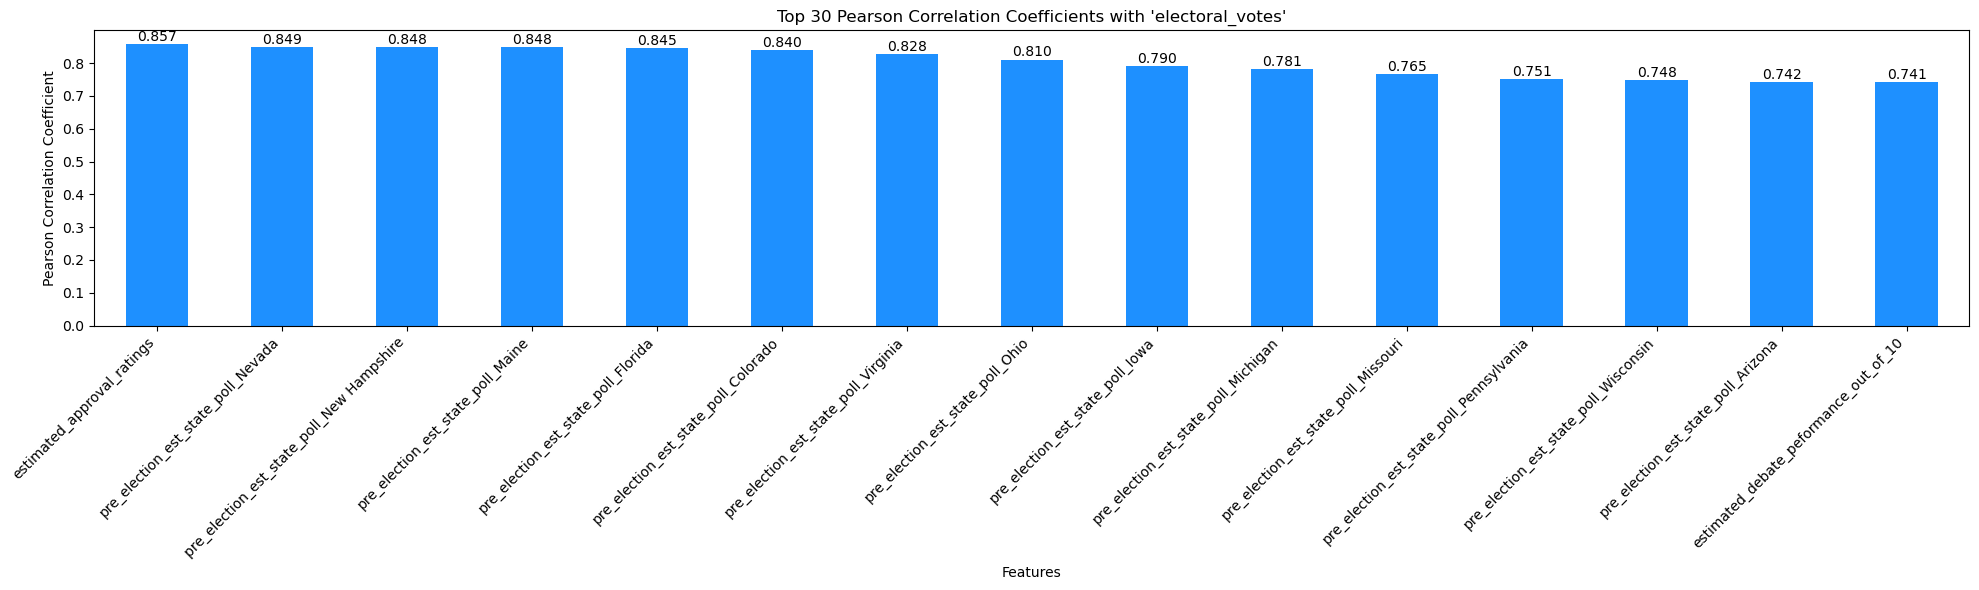

Top 30 Features by Correlation with 'electoral_votes':
['estimated_approval_ratings', 'pre_election_est_state_poll_Nevada', 'pre_election_est_state_poll_New Hampshire', 'pre_election_est_state_poll_Maine', 'pre_election_est_state_poll_Florida', 'pre_election_est_state_poll_Colorado', 'pre_election_est_state_poll_Virginia', 'pre_election_est_state_poll_Ohio', 'pre_election_est_state_poll_Iowa', 'pre_election_est_state_poll_Michigan', 'pre_election_est_state_poll_Missouri', 'pre_election_est_state_poll_Pennsylvania', 'pre_election_est_state_poll_Wisconsin', 'pre_election_est_state_poll_Arizona', 'estimated_debate_peformance_out_of_10']


In [5]:



correlations = df[data_columns].corrwith(df['electoral_votes'])
correlations = correlations.sort_values(ascending=False)

top_correlations = correlations[:15]

plt.figure(figsize=(20, 6))
top_correlations.plot(kind='bar', color='dodgerblue')
plt.title("Top 30 Pearson Correlation Coefficients with 'electoral_votes'")
plt.xlabel("Features")
plt.ylabel("Pearson Correlation Coefficient")
plt.xticks(rotation=45, ha='right')


for i, val in enumerate(top_correlations):
    plt.text(i, val + 0.01, f'{val:.3f}', ha='center')


plt.tight_layout()
plt.show()


top_features = list(top_correlations.index)
print("Top 30 Features by Correlation with 'electoral_votes':")
print(top_features)


In [6]:
correlation_matrix = data.corr()

correlation_threshold = .55

columns_to_remove = set()
#print("Columns to be Removed:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > correlation_threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            if feature_i not in columns_to_remove:
                columns_to_remove.add(feature_j)
                #print(f"{feature_j} (correlated with {feature_i}): {correlation:.2f}")

data_filtered = data.drop(columns=columns_to_remove)

In [7]:
print("Columns in data_filtered:")
print(", ".join(f"'{column}'" for column in data_filtered.columns))

print("\nColumns that were removed:")
print(", ".join(f"'{removed_column}'" for removed_column in columns_to_remove))

Columns in data_filtered:
'number_of_children', 'party', 'age', 'years_in_politics', 'estimated_speeches_campaign', 'sum_party_electoral_votes', 'estimated_count_of_scandals_or_controversies', 'estimated_approval_ratings', 'interest_rates_perc', 'house_democrat_or_republician', 'unemployment_rate_perc', 'GDP_growth_perc', 'pre_election_est_state_poll_Georgia', 'pre_election_est_state_poll_Alaska', 'pre_election_est_state_poll_Arkansas', 'pre_election_est_state_poll_Idaho', 'pre_election_est_state_poll_Louisiana', 'pre_election_est_state_poll_Montana', 'pre_election_est_state_poll_North Dakota', 'pre_election_est_state_poll_Oklahoma', 'pre_election_est_state_poll_South Dakota', 'pre_election_est_state_poll_Utah', 'pre_election_est_state_poll_West Virginia', 'pre_election_est_state_poll_Wyoming', 'pre_election_est_state_poll_California', 'pre_election_est_state_poll_Connecticut', 'pre_election_est_state_poll_Delaware', 'pre_election_est_state_poll_Hawaii', 'pre_election_est_state_poll_Il

In [8]:
features = ['pre_election_est_state_poll_Nevada',
            'pre_election_est_state_poll_Maine',
            'pre_election_est_state_poll_Virginia', 'pre_election_est_state_poll_Ohio', 'pre_election_est_state_poll_Iowa',

            'estimated_approval_ratings','estimated_speeches_campaign',
            
            'estimated_count_of_scandals_or_controversies','pre_election_est_state_poll_Wisconsin', 'GDP_growth_perc', 'unemployment_rate_perc', 'years_in_politics', 'interest_rates_perc', 
            

            'party', 'estimated_media_presence_out_of_10', 'estimated_debate_peformance_out_of_10',
            
            
           ]


target_variable = 'electoral_votes'

num_features = len(features)

print(f"Number of features: {num_features}")


#2

Number of features: 16


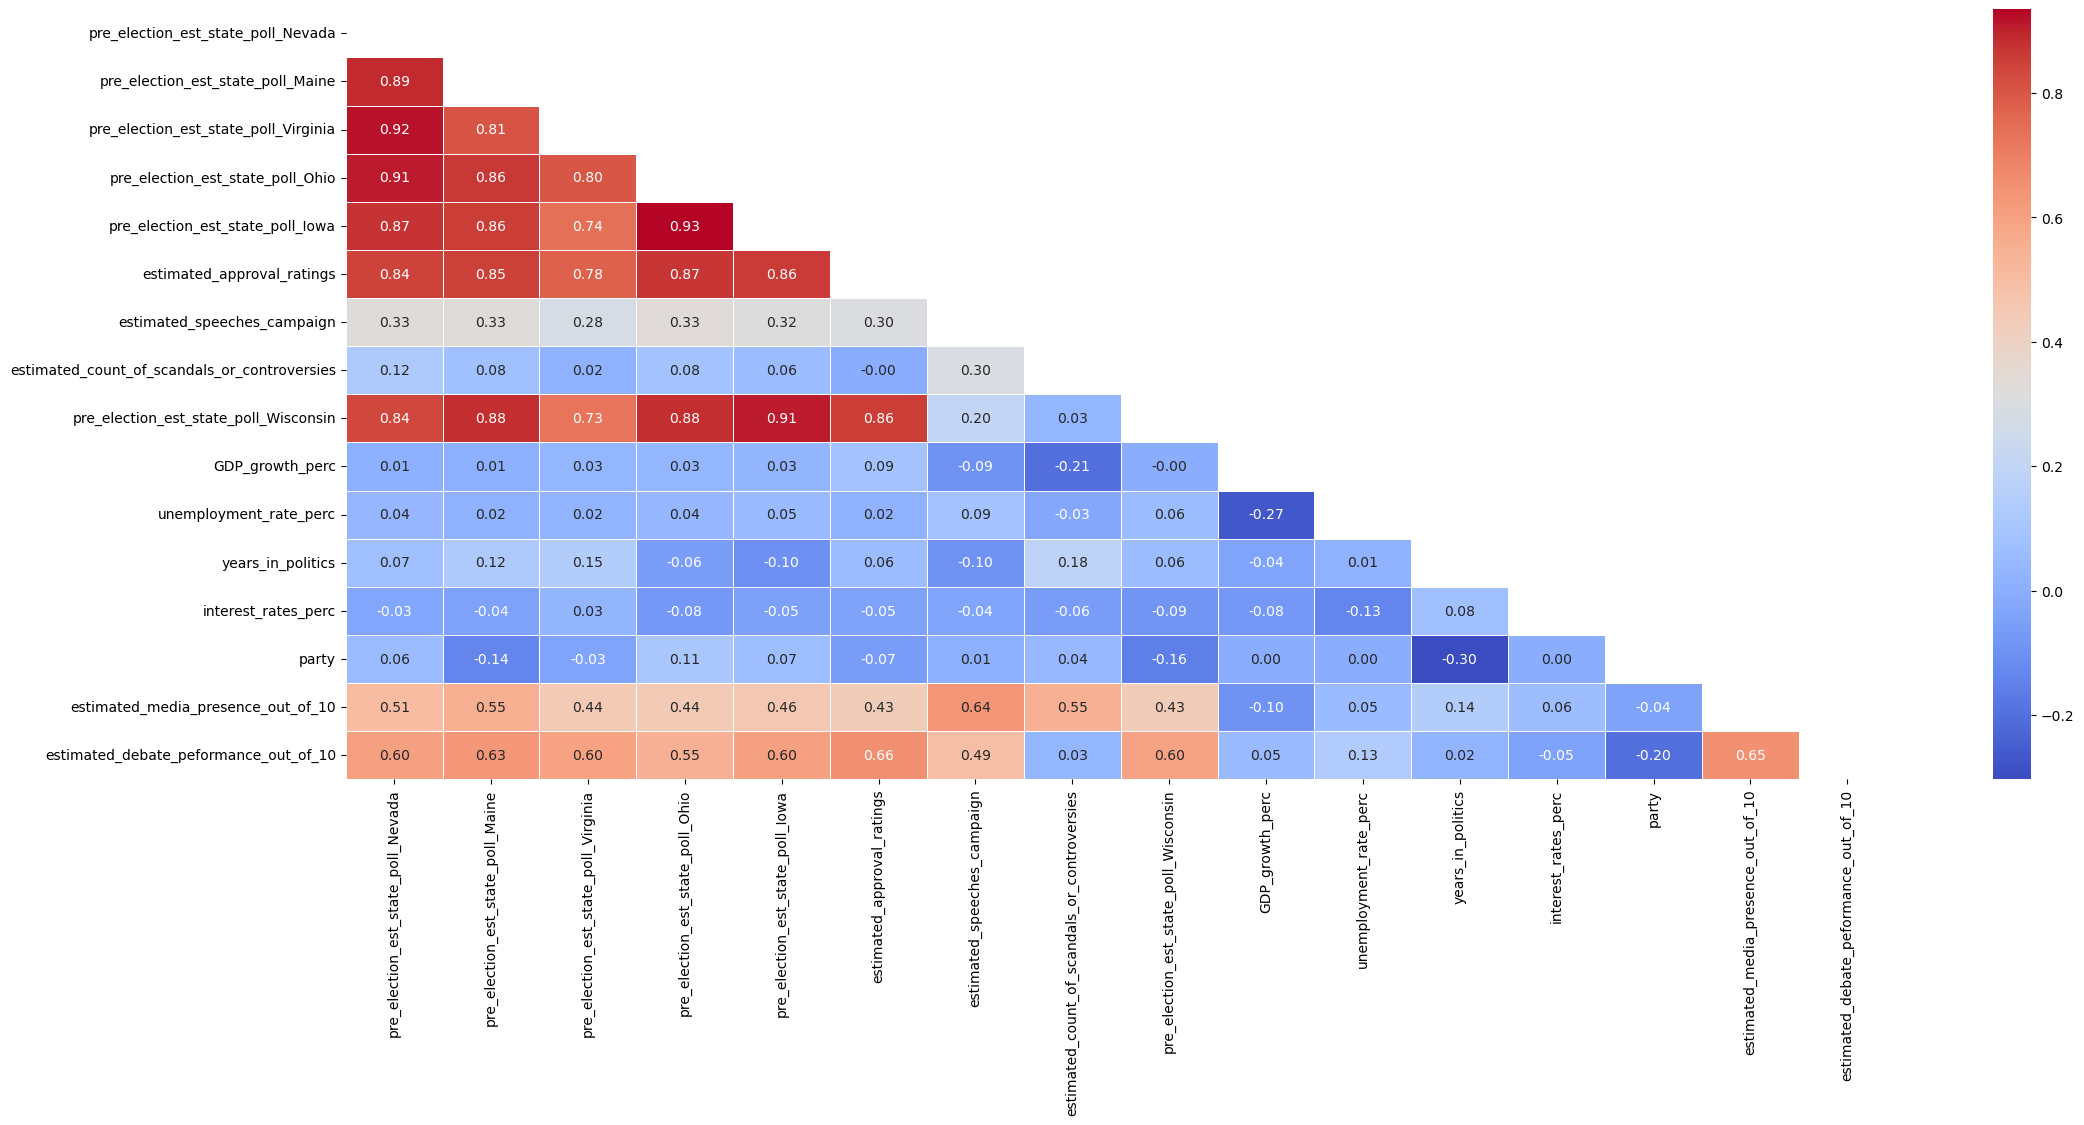

In [9]:
selected_features_data = data[features]
correlation_matrix = selected_features_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask)
plt.show()

   Year      candidate  electoral_votes     pred_ev
1  2024   Donald Trump              269  284.764657
0  2024  Kamala Harris              269  253.235343
MAE Scores (Adjusted): 

MAE:  15.764656971965024
-----------------------------------------------------------------------------



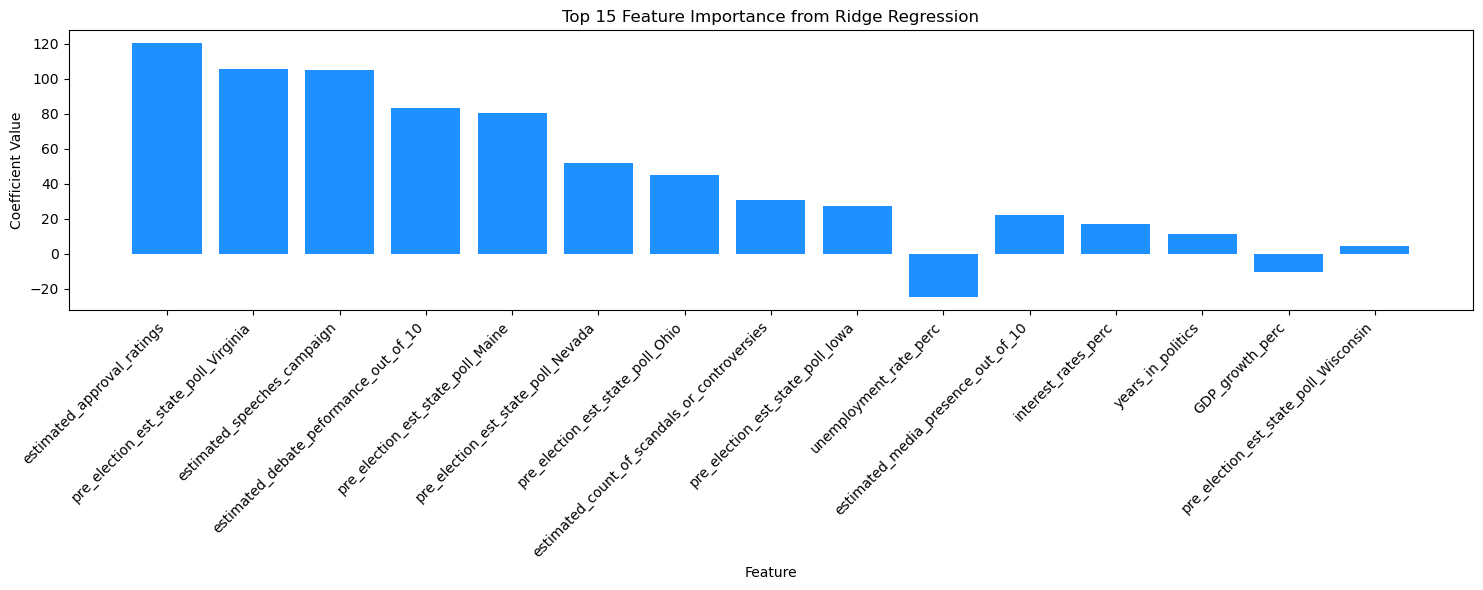

In [10]:
#step 1: set the test year - ja
test_year = 2024

#step 2: filter the training and test data - ja
train = df[df["Year"] < test_year].copy()
test = df[df["Year"] == test_year].copy()

#step 3: apply minmaxscaler to the features - ja
sc = MinMaxScaler()
sc.fit(train[features])
train[features] = sc.transform(train[features])
test[features] = sc.transform(test[features])

#step 4: train ridge regression model - ja
ridge = Ridge(alpha=1.0)
ridge.fit(train[features], train["electoral_votes"])

#step 5: make predictions on test data - ja
predictions = ridge.predict(test[features])
predictions = pd.DataFrame(predictions, columns=["pred_ev"], index=test.index)

#step 6: concatenate test data with predictions - ja
frame = pd.concat([test[["Year", "candidate", "electoral_votes"]], predictions], axis=1)
frame.sort_values(["Year", "pred_ev"], inplace=True, ascending=[False, False])

#step 7: define the adjustment function - ja
def adjust_predictions(ridge_reg_frame):
    
    #step 1: calculate the total electoral votes and predicted electoral votes - ja
    total_electoral_votes = ridge_reg_frame['electoral_votes'].sum()
    total_pred_ev = ridge_reg_frame['pred_ev'].sum()

    #step 2: calculate the difference between the sums - ja
    difference = abs(total_electoral_votes - total_pred_ev)

    #step 3: adjust the predicted values based on the difference - ja
    if total_pred_ev < total_electoral_votes:
        #case 1: predicted total is less than actual total - ja
        adjustment = difference / 2
        ridge_reg_frame['pred_ev'] += adjustment
    elif total_pred_ev > total_electoral_votes:
        #case 2: predicted total is greater than actual total - ja
        adjustment = difference / 2
        ridge_reg_frame['pred_ev'] -= adjustment
    
    return ridge_reg_frame

#step 8: adjust the predicted values - ja
adjusted_frame = adjust_predictions(frame)

#step 9: calculate mae using the adjusted frame - ja
def calculate_mae(df):
    true_values = df["electoral_votes"].values
    predicted_values = df["pred_ev"].values
    mae = mean_absolute_error(true_values, predicted_values)
    return mae

print(adjusted_frame)

#calculate and print mae for the adjusted frame - ja
mae_score = calculate_mae(adjusted_frame)

print("MAE Scores (Adjusted): ")
print("=============================================================================\n")
print("MAE: ", mae_score)
print("-----------------------------------------------------------------------------\n")

#step 10: plot feature importances - ja
coefficients = ridge.coef_
feature_coefficients = dict(zip(features, coefficients))
sorted_feature_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

top_features = sorted_feature_coefficients[:15]
features_names = [x[0] for x in top_features]
coeff_values = [x[1] for x in top_features]

plt.figure(figsize=(15, 6))
plt.bar(features_names, coeff_values, color='dodgerblue')
plt.title('Top 15 Feature Importance from Ridge Regression')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [11]:
#function to adjust predicted values - ja
def adjust_predictions(ridge_reg_frame):
    #calculate total electoral votes and predicted electoral votes - ja
    total_electoral_votes = ridge_reg_frame['electoral_votes'].sum()
    total_pred_ev = ridge_reg_frame['pred_ev'].sum()

    #calculate the difference between sums - ja
    difference = abs(total_electoral_votes - total_pred_ev)

    #adjust predictions based on the difference - ja
    if total_pred_ev < total_electoral_votes:
        #case 1: predicted total is less than actual total - ja
        adjustment = difference / 2
        ridge_reg_frame['pred_ev'] += adjustment
    elif total_pred_ev > total_electoral_votes:
        #case 2: predicted total is greater than actual total - ja
        adjustment = difference / 2
        ridge_reg_frame['pred_ev'] -= adjustment
    
    return ridge_reg_frame

#function to find average precision (ap) - ja
def find_ap(frame):
    actual = frame.sort_values("electoral_votes", ascending=False).head(1)  #top 1 actual candidate - ja
    predicted = frame.sort_values("pred_ev", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["candidate"] in actual["candidate"].values:
            found += 1
            ps.append(found / seen)
        seen += 1
    return sum(ps) / len(ps) if ps else 0  #calculate ap if found, else return 0 - ja


In [12]:
#initialize dataframe for combined predictions - ja
ridge_reg_combined_predictions = pd.DataFrame(columns=["Year", "candidate", "pred_ev", "electoral_votes"])

all_predictions = []
aps = []
maes = []

backtest_seasons = [2000, 2004, 2008, 2012, 2016, 2020, 2024]

#iterate over each season in backtest_seasons - ja
for season in backtest_seasons:
    train = df[df["Year"] < season].copy()
    test = df[df["Year"] == season].copy()

    #apply minmaxscaler - ja
    sc = MinMaxScaler()
    sc.fit(train[features])
    train[features] = sc.transform(train[features])
    test[features] = sc.transform(test[features])

    #train ridge regression model - ja
    ridge.fit(train[features], train['electoral_votes'])
    predictions = ridge.predict(test[features])
    predictions_df = pd.DataFrame(predictions, columns=["pred_ev"], index=test.index)
    frame = pd.concat([test[["candidate", "electoral_votes", "Year"]], predictions_df], axis=1)

    #filter out empty or all-na columns before concatenating - ja
    frame = frame.dropna(how='all', axis=1)

    #adjust predictions using the adjust_predictions function - ja
    adjusted_frame = adjust_predictions(frame)

    #add the adjusted frame to combined predictions dataframe - ja
    ridge_reg_combined_predictions = pd.concat([ridge_reg_combined_predictions, adjusted_frame], ignore_index=True)

    if not adjusted_frame.empty:
        all_predictions.append(adjusted_frame)

        #calculate ap (average precision) - ja
        ap = find_ap(adjusted_frame)
        aps.append(ap)

        #calculate mae on the adjusted predictions - ja
        mae = mean_absolute_error(adjusted_frame["electoral_votes"], adjusted_frame["pred_ev"])
        maes.append(mae)

        reciprocal_ap = 1 / ap if ap != 0 else np.inf  #avoid divide by zero - ja
        print(f"President AP for Season {season}: {round(ap, 2)} | Reciprocal: {round(reciprocal_ap, 2)} | MAE: {round(mae, 2)}")
    else:
        print(f"No data for Season {season}")

#print final rankings for each season - ja
for idx, predictions in enumerate(all_predictions):
    season = backtest_seasons[idx]
    
    total_pred_ps = predictions["pred_ev"].sum()
    
    predictions['win_prob'] = predictions['pred_ev'] / total_pred_ps
    
    top5_predictions = predictions.sort_values("pred_ev", ascending=False).head(10)

    print(f"\nTop 2 Predicted Candidates for Year {season}:")
    print(top5_predictions[["candidate", "pred_ev", "win_prob", "electoral_votes"]])

#summary statistics - ja
average_mae = np.mean(maes)
average_ap = np.mean(aps)

reciprocal_average_ap = 1.0 / average_ap if average_ap != 0 else np.inf

last_n_seasons_aps = aps[-10:]
min_ap = np.min(last_n_seasons_aps)
max_ap = np.max(last_n_seasons_aps)

reciprocal_min_ap = 1.0 / min_ap if min_ap != 0 else np.inf
reciprocal_max_ap = 1.0 / max_ap if max_ap != 0 else np.inf

print("\nAverage Error Metrics Across All Seasons:")
print("=============================================================================")
print(f"Average President Rank: {round(reciprocal_average_ap, 2)} | Average MAE: {round(average_mae, 2)}")
print(f"Min President Rank: {round(reciprocal_min_ap, 2)}")
print(f"Max President Rank: {round(reciprocal_max_ap, 2)}")
print("=============================================================================")

#save the combined predictions to csv - ja
ridge_reg_combined_predictions.to_csv("ridge_curr_pres_preds.csv", index=False)


President AP for Season 2000: 1.0 | Reciprocal: 1.0 | MAE: 19.76
President AP for Season 2004: 1.0 | Reciprocal: 1.0 | MAE: 5.5
President AP for Season 2008: 1.0 | Reciprocal: 1.0 | MAE: 8.38
President AP for Season 2012: 1.0 | Reciprocal: 1.0 | MAE: 0.35
President AP for Season 2016: 1.0 | Reciprocal: 1.0 | MAE: 4.14
President AP for Season 2020: 1.0 | Reciprocal: 1.0 | MAE: 0.19
President AP for Season 2024: 0.5 | Reciprocal: 2.0 | MAE: 15.76

Top 2 Predicted Candidates for Year 2000:
         candidate    pred_ev  win_prob  electoral_votes
13  George W. Bush  290.76141  0.541455              271
12         Al Gore  246.23859  0.458545              266

Top 2 Predicted Candidates for Year 2004:
         candidate     pred_ev  win_prob  electoral_votes
10  George W. Bush  280.499309  0.522345              286
11      John Kerry  256.500691  0.477655              251

Top 2 Predicted Candidates for Year 2008:
      candidate     pred_ev  win_prob  electoral_votes
8  Barack Obama  356.6

C:\Users\allen\AppData\Local\Temp\ipykernel_24452\475569812.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ridge_reg_combined_predictions = pd.concat([ridge_reg_combined_predictions, adjusted_frame], ignore_index=True)


Top 10 Features:
['estimated_speeches_campaign', 'estimated_approval_ratings', 'estimated_debate_peformance_out_of_10', 'pre_election_est_state_poll_Maine', 'estimated_count_of_scandals_or_controversies', 'pre_election_est_state_poll_Ohio', 'pre_election_est_state_poll_Virginia', 'estimated_media_presence_out_of_10', 'pre_election_est_state_poll_Iowa', 'pre_election_est_state_poll_Nevada']


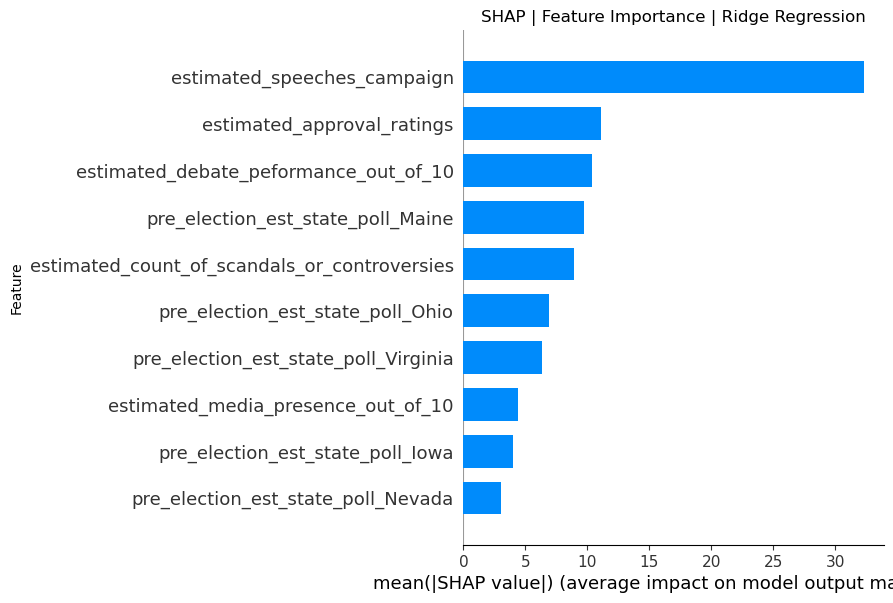

In [13]:
explainer = shap.LinearExplainer(ridge, train[features])
shap_values = explainer.shap_values(test[features])

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1][:10]

top_features_list = [features[index] for index in top_features]
print("Top 10 Features:")
print(top_features_list)

shap_values_top = shap_values[:, top_features]
test_top_features = test[top_features_list]

shap.summary_plot(shap_values_top, test_top_features, feature_names=top_features_list, plot_type="bar", show=False)
plt.gcf().set_size_inches(10, 6)
plt.title('SHAP | Feature Importance | Ridge Regression')

plt.savefig("ridge_shap_bar.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("ridge_shap_bar.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("ridge_shap_bar.png")

plt.ylabel("Feature")
plt.show()

Top 10 Features:
['estimated_speeches_campaign', 'estimated_approval_ratings', 'estimated_debate_peformance_out_of_10', 'pre_election_est_state_poll_Maine', 'estimated_count_of_scandals_or_controversies', 'pre_election_est_state_poll_Ohio', 'pre_election_est_state_poll_Virginia', 'estimated_media_presence_out_of_10', 'pre_election_est_state_poll_Iowa', 'pre_election_est_state_poll_Nevada']


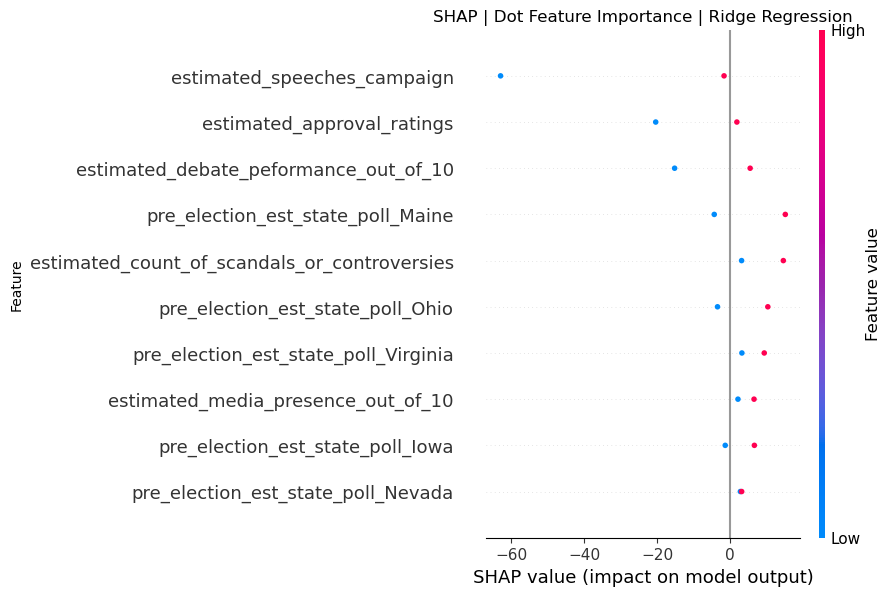

In [14]:

explainer = shap.LinearExplainer(ridge, train[features])
shap_values = explainer.shap_values(test[features])

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1][:10]

top_features_list = [features[index] for index in top_features]
print("Top 10 Features:")
print(top_features_list)

shap_values_top = shap_values[:, top_features]
test_top_features = test[top_features_list]

shap.summary_plot(shap_values_top, test_top_features, feature_names=top_features_list, show=False)
plt.gcf().set_size_inches(10, 6)

plt.title('SHAP | Dot Feature Importance | Ridge Regression')

plt.savefig("rig_shap_dot.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("rig_shap_dot.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("rig_shap_dot.png")

plt.ylabel("Feature")
plt.show()

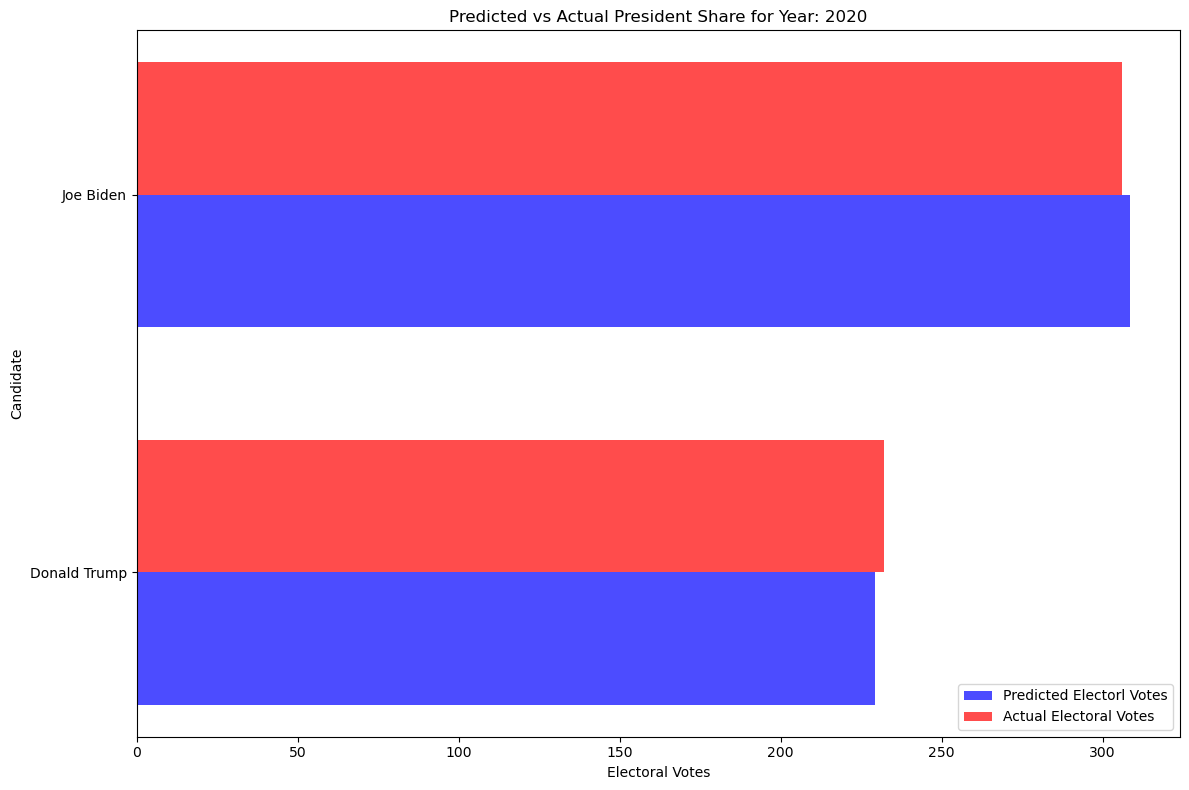

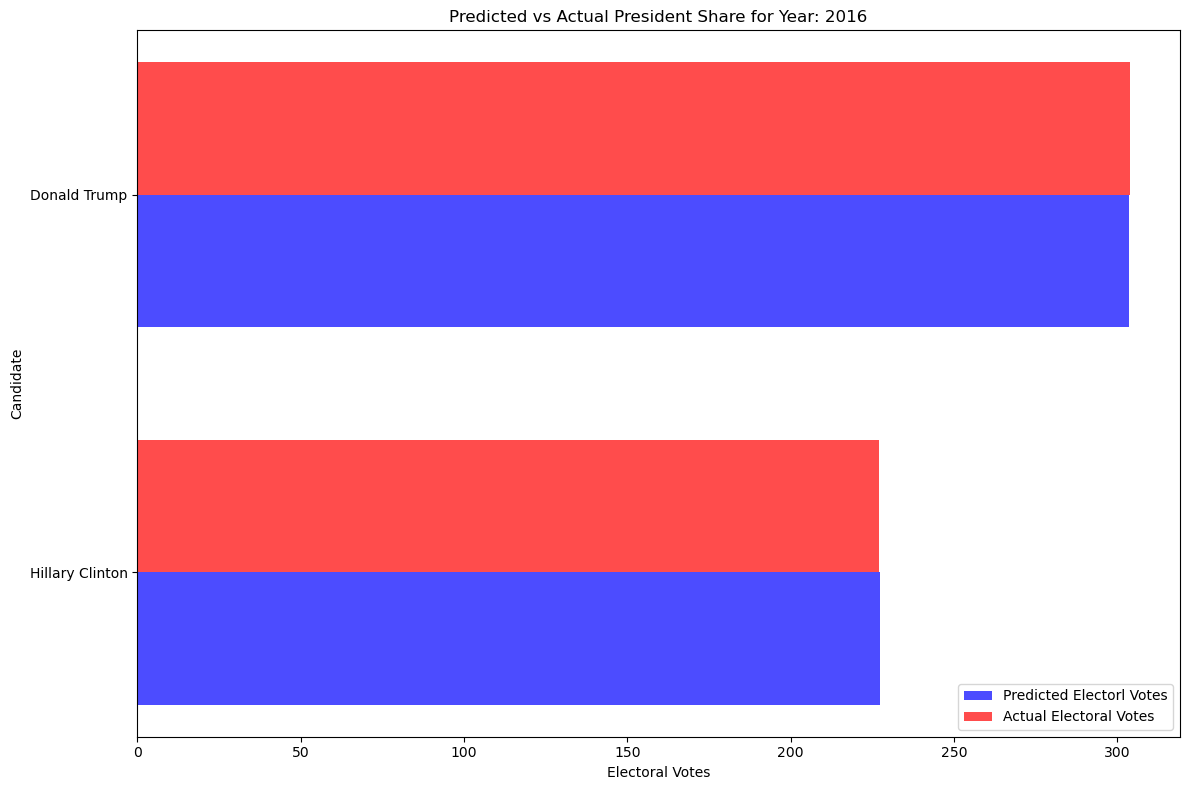

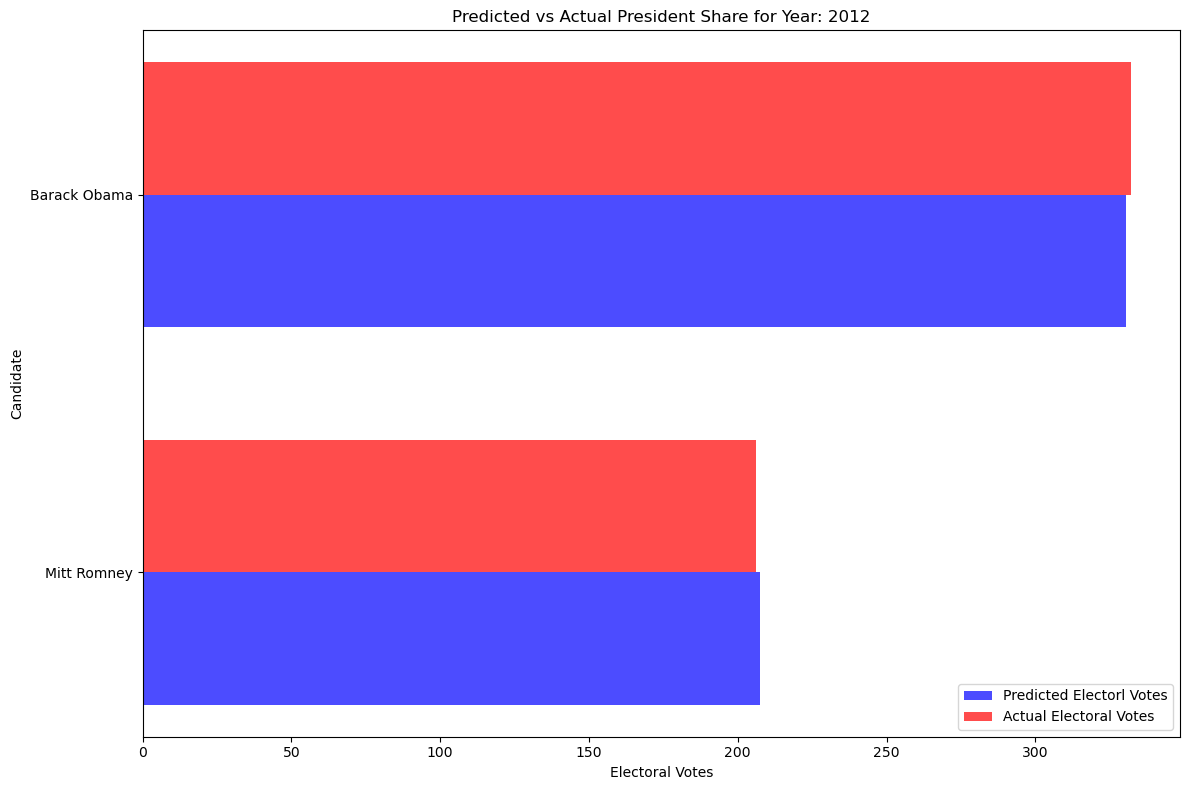

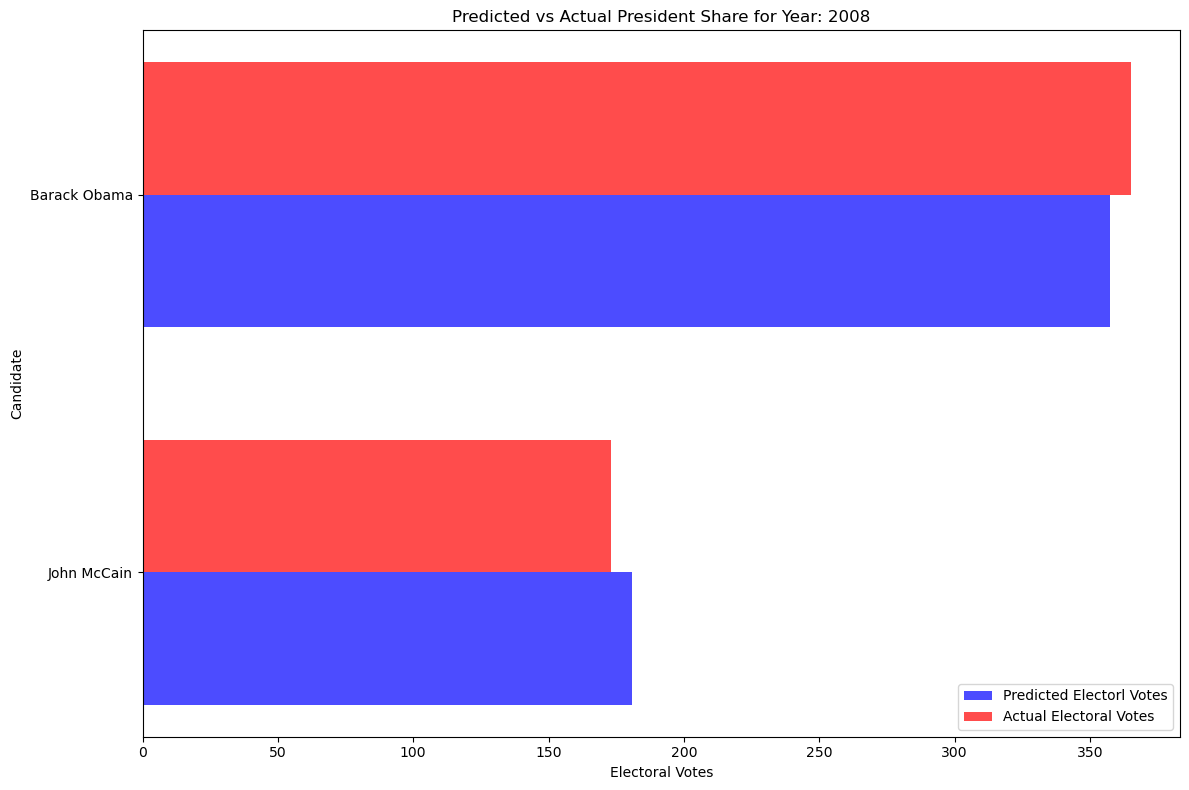

In [48]:

df = pd.read_csv("ridge_curr_pres_preds.csv")

seasons_to_plot = [2020,2016,2012,2008]

for season in seasons_to_plot:
    season_df = df[df['Year'] == season].copy()
    
    season_df = season_df.sort_values(by='pred_ev', ascending=True).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    index = season_df.index
    
    bar_width = 0.35
    
    positions1 = index - bar_width / 2
    positions2 = index + bar_width / 2
    
    bars1 = ax.barh(positions1, season_df['pred_ev'], bar_width, label='Predicted Electorl Votes', alpha=0.7, color='b')
    
    bars2 = ax.barh(positions2, season_df['electoral_votes'], bar_width, label='Actual Electoral Votes', alpha=0.7, color='r')
    
    ax.set_ylabel('Candidate')
    ax.set_xlabel('Electoral Votes')
    ax.set_title(f'Predicted vs Actual President Share for Year: {season}')
    
    ax.set_yticks(index)
    ax.set_yticklabels(season_df['candidate'])
    
    # Add legend
    ax.legend()
    
    # Display the plot
    plt.tight_layout()
    plt.show()